<h1> Материалы курса "Анализ данных в инфромационной безопасности" </h1>

<h2> Ноутбук к презентации "Подготовка данных"</h2>

<p>Андрей Скороходов, UDV Group</p>
<p>mail: andrei.skorokhodov@udv.group, telegram: @Spongillas</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Очистка данных

## 1.1. Обработка синтаксиса, типов, структуры

In [2]:
df = pd.DataFrame(
    {
        'column1': [11, 21, 31, 31, 41, 51], 
        'column2': [12, 22, 32, 32, 42, 52],
        'column3': [13, '23', 33, 33, 43, 53],
        'column4': ['Первый', 'первый', 'второй', 
                    ' второй', 'третий', 'четвертый']
    }
)

df

,column1,column2,column3,column4
0,11,12,13,Первый
1,21,22,23,первый
2,31,32,33,второй
3,31,32,33,второй
4,41,42,43,третий
5,51,52,53,четвертый


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   column1  6 non-null      int64 
 1   column2  6 non-null      int64 
 2   column3  6 non-null      object
 3   column4  6 non-null      object
dtypes: int64(2), object(2)
memory usage: 324.0+ bytes


In [4]:
df['column3'].unique()

array([13, '23', 33, 43, 53], dtype=object)

In [5]:
df['column3'] = df['column3'].astype(int)
df['column3'].unique()

array([13, 23, 33, 43, 53])

In [6]:
df['column4'] = df['column4'].str.lower()
df['column4'].unique()

array(['первый', 'второй', ' второй', 'третий', 'четвертый'], dtype=object)

In [7]:
df['column4'] = df['column4'].str.strip()
df['column4'].unique()

array(['первый', 'второй', 'третий', 'четвертый'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   column1  6 non-null      int64 
 1   column2  6 non-null      int64 
 2   column3  6 non-null      int32 
 3   column4  6 non-null      object
dtypes: int32(1), int64(2), object(1)
memory usage: 300.0+ bytes


In [9]:
df

,column1,column2,column3,column4
0,11,12,13,первый
1,21,22,23,первый
2,31,32,33,второй
3,31,32,33,второй
4,41,42,43,третий
5,51,52,53,четвертый


## 1.2. Обработка дубликатов

In [10]:
df[df.duplicated(keep=False)]

,column1,column2,column3,column4
2,31,32,33,второй
3,31,32,33,второй


In [11]:
df = df.drop_duplicates()
df

,column1,column2,column3,column4
0,11,12,13,первый
1,21,22,23,первый
2,31,32,33,второй
4,41,42,43,третий
5,51,52,53,четвертый


## 1.3. Обработка пропущенных значений

In [12]:
df = df.copy()
df['columnn5'] = np.NaN
df.iloc[0,0] = np.NaN
df.iloc[2,1] = np.NaN
df

,column1,column2,column3,column4,columnn5
0,NaN,12.0,13,первый,NaN
1,21.0,22.0,23,первый,NaN
2,31.0,NaN,33,второй,NaN
4,41.0,42.0,43,третий,NaN
5,51.0,52.0,53,четвертый,NaN


In [13]:
df.interpolate(axis=0)

,column1,column2,column3,column4,columnn5
0,NaN,12.0,13,первый,NaN
1,21.0,22.0,23,первый,NaN
2,31.0,32.0,33,второй,NaN
4,41.0,42.0,43,третий,NaN
5,51.0,52.0,53,четвертый,NaN


In [14]:
df.dropna(how='all', axis=1)

,column1,column2,column3,column4
0,NaN,12.0,13,первый
1,21.0,22.0,23,первый
2,31.0,NaN,33,второй
4,41.0,42.0,43,третий
5,51.0,52.0,53,четвертый


## 1.4. Обработка выбросов

In [15]:
df = pd.DataFrame(
    {
        'Кол-во комнат в доме': [2, 3, 4, 4, 3, 3, 2, 4, 2],
        'Стоимость, usd': [400, 500, 600, 610, 50, 480, 450, 605, 440]
    }
)

df

,Кол-во комнат в доме,"Стоимость, usd"
0,2,400
1,3,500
2,4,600
3,4,610
4,3,50
5,3,480
6,2,450
7,4,605
8,2,440


<Axes: title={'center': 'Стоимость аренды дома'}, xlabel='Кол-во комнат в доме', ylabel='Стоимость, usd'>

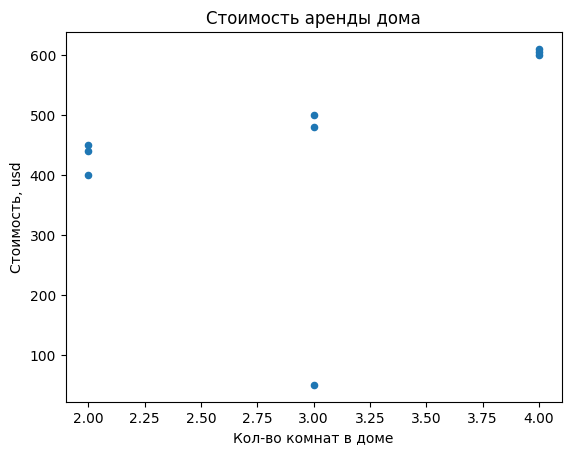

In [16]:
df.plot.scatter(y='Стоимость, usd', 
                x='Кол-во комнат в доме',
                title='Стоимость аренды дома')

# 2. Предобработка данных

## 2.1. Стандартизация и нормализация

In [17]:
df = pd.DataFrame({
    'exponential': np.random.exponential(10, 1000),
    'normal': np.random.normal(10, 2, 1000)}
                 )
df.head(10)

,exponential,normal
0,4.754290,9.984181
1,1.587450,11.655212
2,4.412264,10.398054
3,4.163274,10.033430
4,6.663166,11.433702
5,12.098427,8.070816
6,5.929021,10.970192
7,13.897235,10.466088
8,10.043783,13.344064
9,18.260618,9.327555


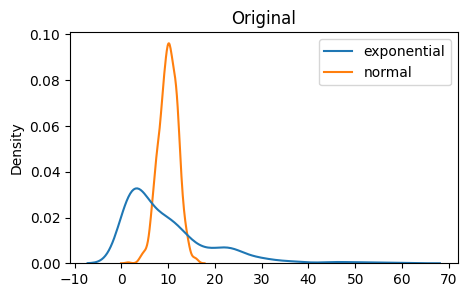

In [18]:
plt.figure(figsize=(5,3))
sns.kdeplot(df)
plt.title('Original')
plt.show()

In [19]:
df.describe().loc[['mean', 'std']]

,exponential,normal
mean,9.853045,10.019174
std,9.577047,2.041389


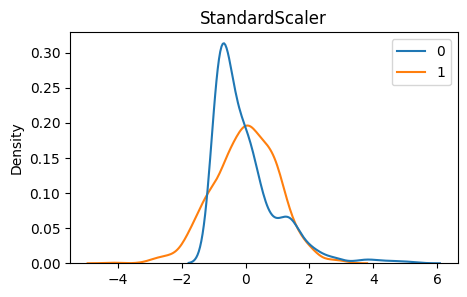

In [20]:
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)


plt.figure(figsize=(5,3))
sns.kdeplot(df1)
plt.title('StandardScaler')
plt.show()

In [21]:
pd.DataFrame(df1).describe().loc[['mean', 'std']].apply(np.round)

,0,1
mean,-0.0,0.0
std,1.0,1.0


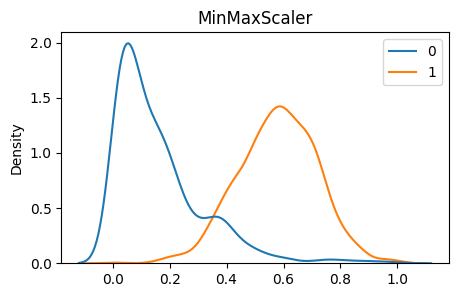

In [22]:
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(5,3))
df2 = MinMaxScaler().fit_transform(df)
sns.kdeplot(df2)
plt.title('MinMaxScaler')
plt.show()

In [23]:
pd.DataFrame(df2).describe().loc[['mean', 'std']]

,0,1
mean,0.161762,0.578846
std,0.157282,0.138078


## 2.2. Кодирование

In [24]:
df = sns.load_dataset('titanic')

In [25]:
df = df[['sex', 'class', 'age']].copy().dropna().head(10)
df

,sex,class,age
0,male,Third,22.0
1,female,First,38.0
2,female,Third,26.0
3,female,First,35.0
4,male,Third,35.0
6,male,First,54.0
7,male,Third,2.0
8,female,Third,27.0
9,female,Second,14.0
10,female,Third,4.0


In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,  Binarizer

le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
be = Binarizer(threshold=35)

df['sex_le'] = le.fit_transform(df['sex'])
df['age_be'] = be.fit_transform(df[['age']])
df = pd.concat([df, ohe.fit_transform(df[['class']]).astype(int)], axis=1)

df.sort_index(axis=1)

,age,age_be,class,class_First,class_Second,class_Third,sex,sex_le
0,22.0,0.0,Third,0,0,1,male,1
1,38.0,1.0,First,1,0,0,female,0
2,26.0,0.0,Third,0,0,1,female,0
3,35.0,0.0,First,1,0,0,female,0
4,35.0,0.0,Third,0,0,1,male,1
6,54.0,1.0,First,1,0,0,male,1
7,2.0,0.0,Third,0,0,1,male,1
8,27.0,0.0,Third,0,0,1,female,0
9,14.0,0.0,Second,0,1,0,female,0
10,4.0,0.0,Third,0,0,1,female,0


# Трансформация данных

## 3.3. Feature Engineering

In [27]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
import re

df_train['Name_title'] = df_train['Name'].\
    apply(lambda x: re.search(',\s+(\w+)', x)[1])

df_train[['Name_title', 'Name']]                                              

,Name_title,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
...,...,...
886,Rev,"Montvila, Rev. Juozas"
887,Miss,"Graham, Miss. Margaret Edith"
888,Miss,"Johnston, Miss. Catherine Helen ""Carrie"""
889,Mr,"Behr, Mr. Karl Howell"


In [29]:
df_train['Name_title'].value_counts()

Name_title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
the           1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import PolynomialFeatures

pd.DataFrame(PolynomialFeatures(2)
             .fit_transform(df_train[['Pclass', 'Age']].dropna()),
             columns = [1, 'Pclass', 'Age', 'Pclass**2', 'Age*Pclass', 'Age**2'])

,1,Pclass,Age,Pclass**2,Age*Pclass,Age**2
0,1.0,3.0,22.0,9.0,66.0,484.0
1,1.0,1.0,38.0,1.0,38.0,1444.0
2,1.0,3.0,26.0,9.0,78.0,676.0
3,1.0,1.0,35.0,1.0,35.0,1225.0
4,1.0,3.0,35.0,9.0,105.0,1225.0
...,...,...,...,...,...,...
709,1.0,3.0,39.0,9.0,117.0,1521.0
710,1.0,2.0,27.0,4.0,54.0,729.0
711,1.0,1.0,19.0,1.0,19.0,361.0
712,1.0,1.0,26.0,1.0,26.0,676.0


# 4. Обучение модели

## 4.1. Разделение на тестовую и обучающую выборки

In [31]:
df = pd.read_csv('train.csv')
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [32]:
df.shape

(891, 12)

In [33]:
y = df['Survived']
X = df.drop('Survived', axis=1)

y.shape, X.shape

((891,), (891, 11))

In [34]:
test_size = 200

X_train = X[:-200]
X_test = X[-200:]

y_train = y[:-200]
y_test = y[-200:]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(691, 11) (200, 11)
(691,) (200,)


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(694, 11) (197, 11)
(694,) (197,)


## 4.2. Классификация

In [36]:
df = sns.load_dataset('titanic')

In [37]:
df = df.drop(['deck', 'alive'], axis=1)

for col in ['sex', 'embarked', 'class', 'who', 
            'embark_town', 'alone', 'adult_male']:
    col_name = col+'_le'
    df[col_name] = le.fit_transform(df[col])
    df = df.drop(col, axis=1)

for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

df

,survived,pclass,age,sibsp,parch,fare,sex_le,embarked_le,class_le,who_le,embark_town_le,alone_le,adult_male_le
0,0,3,22.000000,1,0,7.2500,1,2,2,1,2,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0,2,0,0,0
2,1,3,26.000000,0,0,7.9250,0,2,2,2,2,1,0
3,1,1,35.000000,1,0,53.1000,0,2,0,2,2,0,0
4,0,3,35.000000,0,0,8.0500,1,2,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,2,1,1,2,1,1
887,1,1,19.000000,0,0,30.0000,0,2,0,2,2,1,0
888,0,3,29.699118,1,2,23.4500,0,2,2,2,2,0,0
889,1,1,26.000000,0,0,30.0000,1,0,0,1,0,1,1


In [38]:
y = df['survived']
X = df.drop('survived', axis=1)

y.shape, X.shape

((891,), (891, 12))

In [39]:
test_size = 200

X_train = X[:-200]
X_test = X[-200:]

y_train = y[:-200]
y_test = y[-200:]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(691, 12) (200, 12)
(691,) (200,)


In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, 
                         max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

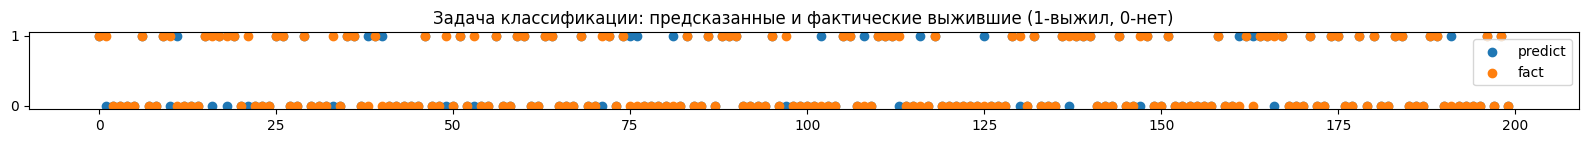

In [41]:
plt.figure(figsize=(20,1))
plt.scatter(x=range(len(y_pred)), y=y_pred, label='predict')
plt.scatter(x=range(len(y_test)), y=y_test, label='fact')
plt.title('Задача классификации: предсказанные и фактические выжившие (1-выжил, 0-нет)')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import (accuracy_score, precision_score, 
                            recall_score, f1_score, roc_curve)

In [43]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred):.2f}")

Accuracy: 0.86
Precision: 0.82
Recall: 0.80
F1-score: 0.81


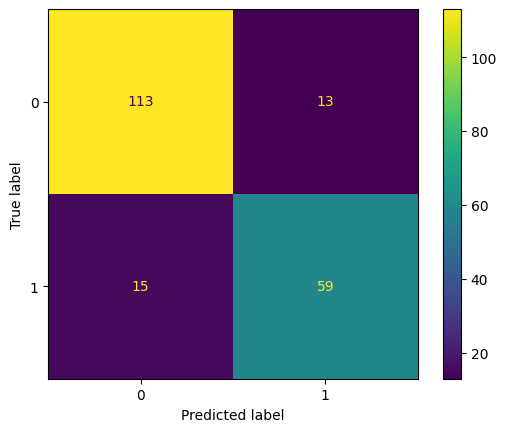

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

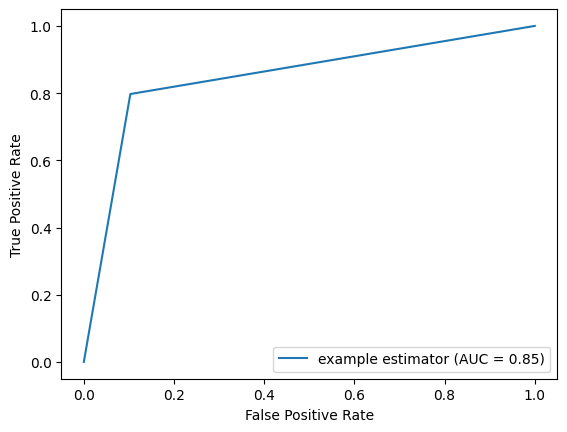

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                          estimator_name='example estimator')
display.plot()

# 4.3. Регрессия

In [46]:
y = df['fare']
X = df.drop(['fare', 'survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42, shuffle=True)

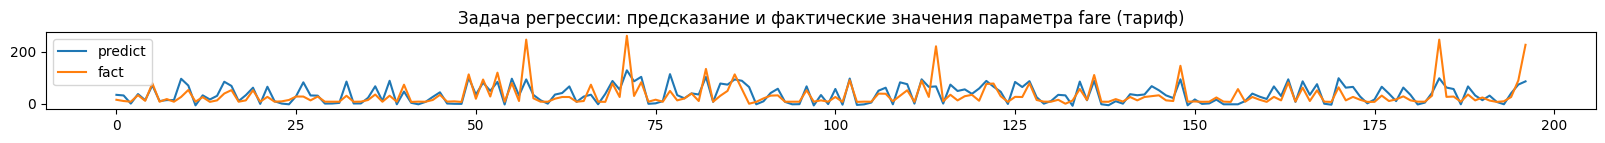

In [47]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)

plt.figure(figsize=(20,1))
plt.plot(range(len(y_pred)), y_pred, label='predict')
plt.plot(range(len(y_test)), y_test, label='fact')
plt.title('Задача регрессии: предсказание и фактические значения параметра fare (тариф)')
plt.legend()
plt.show()

In [48]:
y_test.loc[822] = 0.1
y_test.loc[822] = 0.1

In [49]:
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                             mean_absolute_percentage_error, r2_score)

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

MSE: 1074.8535329645993
RMSE: 32.784958944073715
MAE: 21.16068900067663
MAPE: 738997319933745.9
R2: 0.4269159060827572
